In [1]:
import os
import random
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

#### Datasets:
RAVDESS. This dataset includes around 1500 audio file input from 24 different actors. 12 male and 12 female where these actors record short audios in 8 different emotions i.e 1 = neutral, 2 = calm, 3 = happy, 4 = sad, 5 = angry, 6 = fearful, 7 = disgust, 8 = surprised.
Each audio file is named in such a way that the 7th character is consistent with the different emotions that they represent.

In [2]:
wav_data_path = "data/SpeechAO_AllActors/"

In [3]:
files = os.listdir(wav_data_path)
all_files_path = [os.path.join(wav_data_path, x) for x in files if x.endswith('wav')]
print("Total wav files {}".format(len(all_files_path)))

Total wav files 1440


Duration of wav file is 2.5, shape of test_wav_file (110250,), sample rate 44100, mfcc shape (40, 216)


/Users/ccuulinay/.pyenv/versions/anaconda3-4.2.0/envs/dlnd/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):
/Users/ccuulinay/.pyenv/versions/anaconda3-4.2.0/envs/dlnd/lib/python3.6/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):


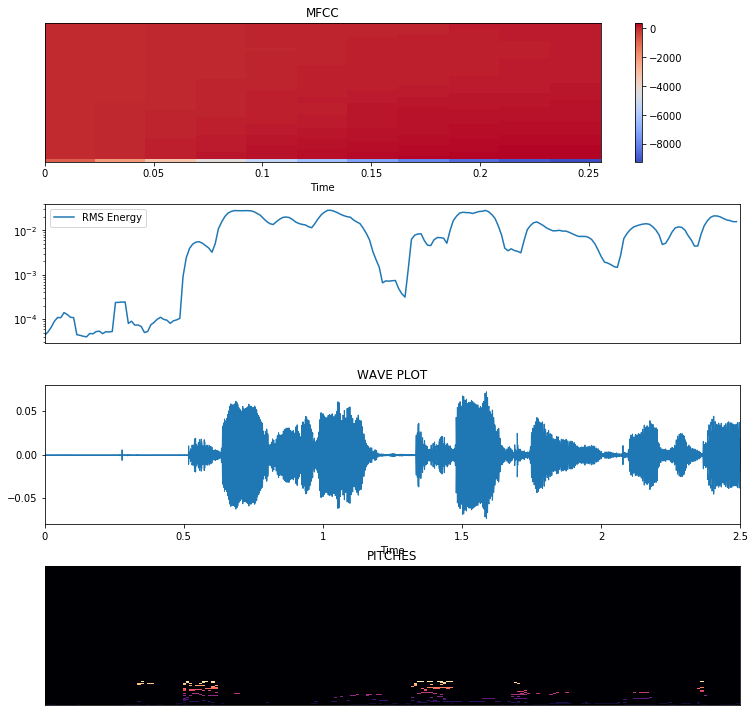

Duration of wav file is 2.5, shape of test_wav_file (110250,), sample rate 44100, mfcc shape (40, 216)


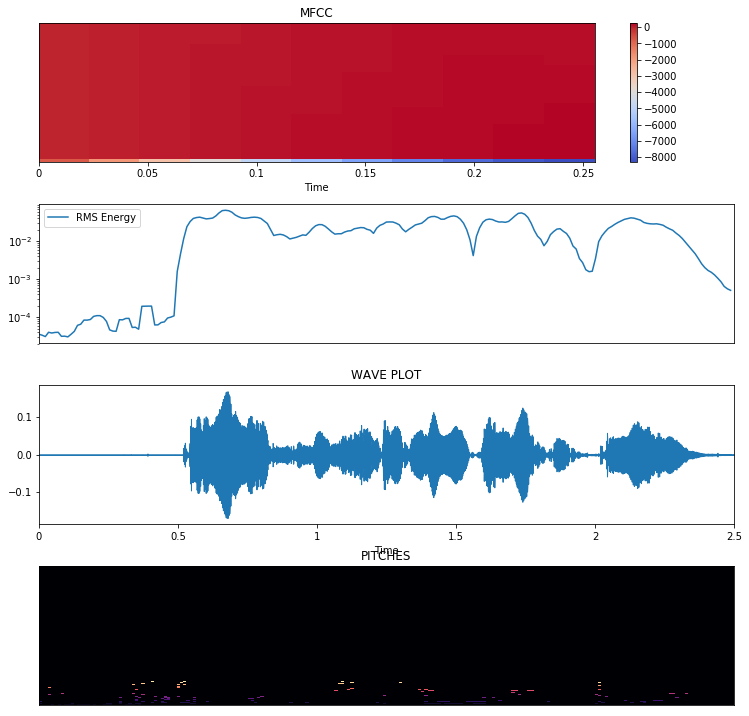

Duration of wav file is 2.5, shape of test_wav_file (110250,), sample rate 44100, mfcc shape (40, 216)


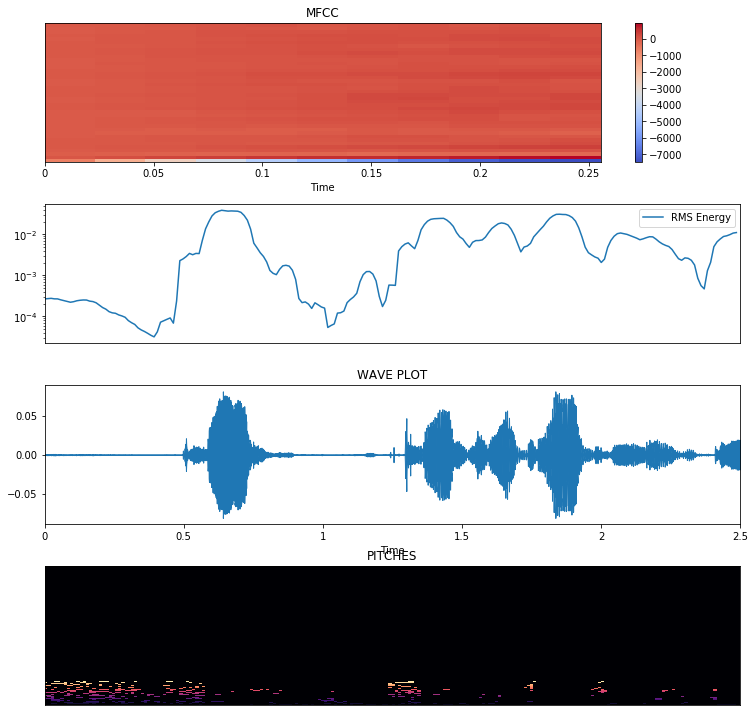

Duration of wav file is 2.5, shape of test_wav_file (110250,), sample rate 44100, mfcc shape (40, 216)


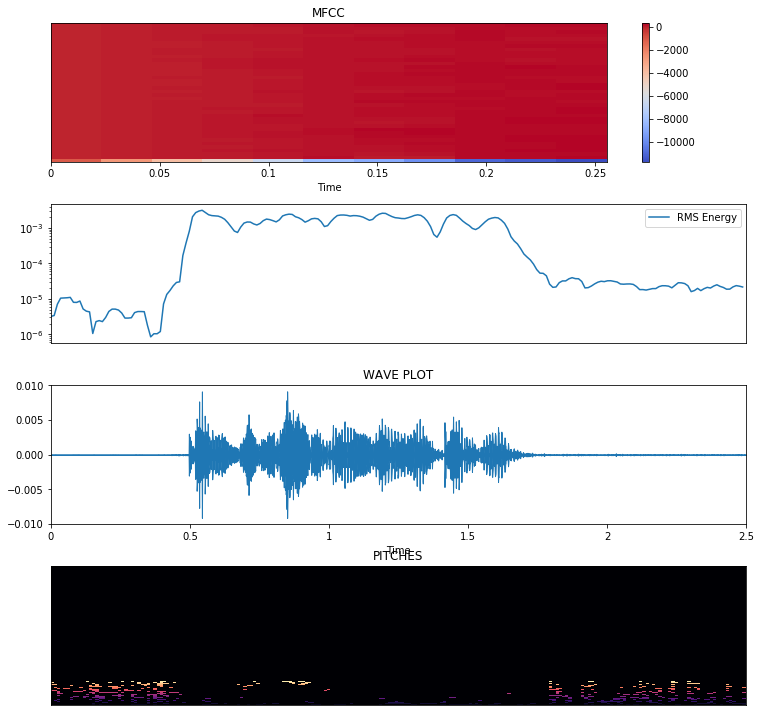

In [6]:
test_wav_list = np.random.choice(files, size=4)
# Load test wav file
for i, test_wav in enumerate(test_wav_list):
    test_wav_time_series, test_wav_sr = librosa.load(os.path.join(wav_data_path,test_wav),duration=2.5,sr=22050*2,offset=0.5)
    test_wav_duration = librosa.core.get_duration(y=test_wav_time_series, sr=test_wav_sr)
    test_wav_mfccs = librosa.feature.mfcc(y=test_wav_time_series, sr=test_wav_sr, n_mfcc=40)
    print("Duration of wav file is {}, shape of test_wav_file {}, sample rate {}, mfcc shape {}"
          .format(test_wav_duration, np.shape(test_wav_time_series),test_wav_sr,np.shape(test_wav_mfccs)))
    plt.figure(figsize=(10, 10))

    test_wav_mfccs = librosa.feature.mfcc(y=test_wav_time_series, sr=test_wav_sr, n_mfcc=40)
    '''
    num_ceps = 12
    cep_lifter = 22
    test_wav_mfccs = test_wav_mfccs[:, 1:num_ceps]
    (nframes, ncoeff) = test_wav_mfccs.shape
    n = np.arange(ncoeff)
    lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
    test_wav_mfccs *= lift  #*
    test_wav_mfccs -= (np.mean(test_wav_mfccs, axis=0) + 1e-8)
    # temp_mfcc = temp_mfcc.ravel()
    '''
    plt.subplot(411)
    librosa.display.specshow(test_wav_mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    
    test_wav_rmse = librosa.feature.rmse(y=test_wav_time_series)
    plt.subplot(412)
    plt.semilogy(test_wav_rmse.T, label='RMS Energy')
    plt.xticks([])
    plt.xlim([0, test_wav_rmse.shape[-1]])
    plt.legend(loc='best')

    plt.subplot(413)
    plt.title('WAVE PLOT')
    librosa.display.waveplot(test_wav_time_series, sr=test_wav_sr)

    test_wav_pitches, test_wav_magnitudes = librosa.piptrack(y=test_wav_time_series, sr=test_wav_sr)
    plt.subplot(414)
    plt.title('PITCHES')
    librosa.display.specshow(test_wav_pitches)

    plt.show()

In [7]:
def get_mfcc_features(a_time_series, a_sample_rate, n_mfcc=40, num_ceps=12, cep_lifter=22):
    # num_ceps = 12
    # cep_lifter = 22
    a_sample_rate = np.array(a_sample_rate)
    temp_mfcc = librosa.feature.mfcc(y=a_time_series, sr=a_sample_rate, n_mfcc=n_mfcc)
    
    temp_mfcc = temp_mfcc[:, 1:num_ceps]
    (nframes, ncoeff) = temp_mfcc.shape
    n = np.arange(ncoeff)
    lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
    temp_mfcc *= lift  #*
    temp_mfcc -= (np.mean(temp_mfcc, axis=0) + 1e-8)
    temp_mfcc = temp_mfcc.ravel()
    return temp_mfcc
    
    # mean_temp_mfcc = np.mean(temp_mfcc, axis=0)
    # mean_temp_mfcc = np.mean(temp_mfcc.T, axis=0)
    # return mean_temp_mfcc
    # return -(mean_temp_mfcc/100)

def get_one_row_features_df(audio_file, **kwargs):
    audio_time_series, audio_sample_rate = librosa.core.load(audio_file,duration=3,sr=22050*2,offset=0.5)
    audio_file_name, audio_file_extention = os.path.basename(audio_file).split('.')
    file_id = str(audio_file_name)
    info_list = audio_file_name.split('-')
    emotion_type = int(info_list[2])
    emotion_intensity = int(info_list[3])
    gender = int(info_list[6]) % 2
    info_df = pd.DataFrame(np.reshape([file_id, emotion_intensity, gender], (1, -1)), 
                           columns=['file_id', 'emotion_intensity', 'gender'])
    # MFCC features
    mean_temp_mfcc = get_mfcc_features(audio_time_series, audio_sample_rate)
    temp_mfcc_df = pd.DataFrame(np.reshape(mean_temp_mfcc, (1, -1)),
                               columns=[str(i)+'_mean_mfcc' for i in range(len(mean_temp_mfcc))])
    temp_mfcc_df['file_id'] = file_id
    
    result_df = pd.merge(info_df, temp_mfcc_df, on='file_id')
    result_df['emotion_type'] = emotion_type
    return result_df

def get_features_df(audio_files, **kwargs):
    features_df = pd.DataFrame()
    for i, audio_file in enumerate(audio_files):
        row = get_one_row_features_df(audio_file)
        features_df = features_df.append(row, ignore_index=True)
    return features_df
    

In [8]:
features_df = get_features_df(all_files_path)

In [192]:
emotion_labels = {1:"neutral", 2:"calm", 3:"happy", 4:"sad", 5:"angry", 6:"fearful", 7:"disgust", 8:"surprised"}

In [193]:
features_df.emotion_type = features_df.emotion_type.map(emotion_labels)

In [9]:
features_df.keys()

Index(['file_id', 'emotion_intensity', 'gender', '0_mean_mfcc', '1_mean_mfcc',
       '2_mean_mfcc', '3_mean_mfcc', '4_mean_mfcc', '5_mean_mfcc',
       '6_mean_mfcc',
       ...
       '431_mean_mfcc', '432_mean_mfcc', '433_mean_mfcc', '434_mean_mfcc',
       '435_mean_mfcc', '436_mean_mfcc', '437_mean_mfcc', '438_mean_mfcc',
       '439_mean_mfcc', 'emotion_type'],
      dtype='object', length=444)

In [10]:
labels_col = ['emotion_type']
id_col = ['file_id']
info_cols = ['emotion_intensity', 'gender']
features_cols = [x for x in features_df.keys().tolist() if x not in labels_col + id_col + info_cols]

In [11]:
nan_count = features_df.isna().sum()
nan_count[nan_count > 0]

Series([], dtype: int64)

In [197]:
features_df.fillna(0, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = features_df[features_cols].values
y = features_df[labels_col].values

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test = X[:1000], X[1000:]
# y_train, y_test = y[:1000], y[1000:]
y_train = y_train.ravel()
y_test = y_test.ravel()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.19791666666666666

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0, solver='saga', max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/ccuulinay/.pyenv/versions/anaconda3-4.2.0/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


KeyboardInterrupt: 

In [16]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cy_train = np_utils.to_categorical(lb.fit_transform(y_train))
cy_test = np_utils.to_categorical(lb.fit_transform(y_test))
# y_train = lb.fit_transform(y_train)
# y_test = lb.fit_transform(y_test)


/Users/ccuulinay/.pyenv/versions/anaconda3-4.2.0/envs/dlnd/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/ccuulinay/.pyenv/versions/anaconda3-4.2.0/envs/dlnd/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [17]:
X_train.shape, cy_train.shape

((1152, 440), (1152, 8))

In [18]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [19]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [28]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(440,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
# Adam is not an good options here.
# adam_opt = keras.optimizers.Adam(lr=0.001)

In [29]:
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              # optimizer=adam_opt,
              metrics=['accuracy'])

In [30]:
from keras_tqdm import TQDMNotebookCallback
cnnhistory=model.fit(x_traincnn, cy_train, batch_size=32, epochs=100, validation_data=(x_testcnn, cy_test),
                    verbose=0, callbacks=[TQDMNotebookCallback()])

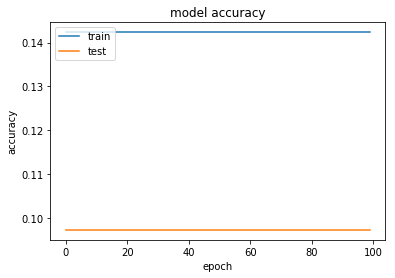

In [31]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

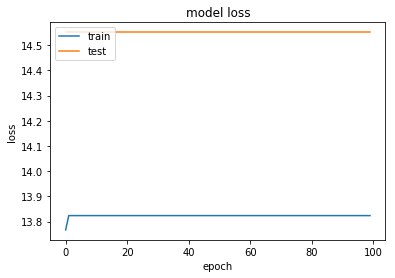

In [32]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [231]:
model_name = 'keras_cnn_128_5_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/ccuulinay/github_proj/audio_analysis/saved_models/keras_cnn_128_5_model.h5 
